<a href="https://colab.research.google.com/github/diptisharnagat/AAI/blob/main/aaimini1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
# Define the Generator (Stylization Network)
generator = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
# Define the Discriminator (PatchGAN for image patches)
discriminator = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', input_shape=[256, 256, 3]),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Conv2D(512, (4, 4), strides=(2, 2), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(0.2),
    tf.keras.layers.Conv2D(1, (4, 4), strides=(1, 1), padding='same')
])

In [ ]:
# Define the loss functions
def generator_loss(fake_output):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(fake_output), logits=fake_output))

def discriminator_loss(real_output, fake_output):
    real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.ones_like(real_output), logits=real_output))
    fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.zeros_like(fake_output), logits=fake_output))
    return real_loss + fake_loss

In [ ]:
# Define the optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
# Preprocess image and loading
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

content_image = load_image('content2.png')
style_image = load_image('klimt.jpg')

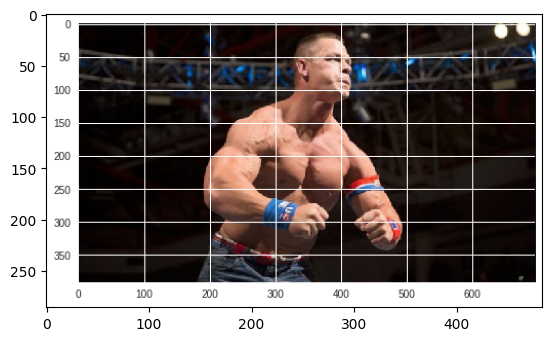

In [ ]:
# Visualizing input images
content_image.shape
plt.imshow(np.squeeze(content_image))
plt.show()

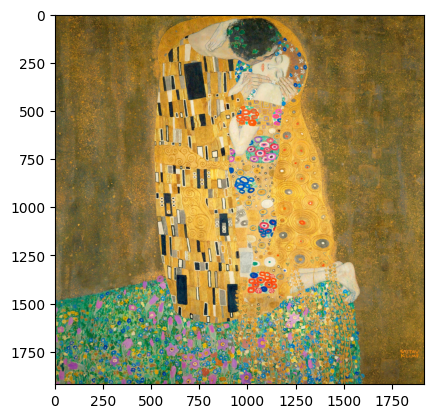

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

In [ ]:
#Stylizing image
stylized_image = generator(tf.constant(content_image), tf.constant(style_image))[0]

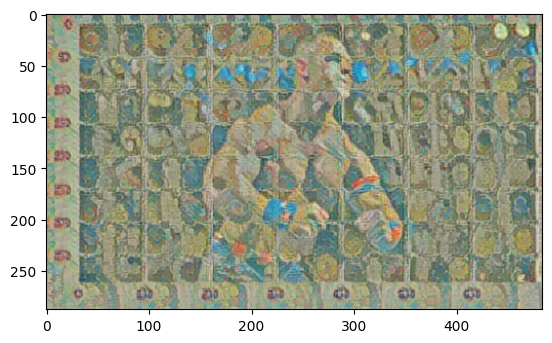

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
# Save stylized image
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True